# PCA - Words
## Words as individuals

### Read df
- idx: Index associated by BERT to each word

In [1]:
import pandas as pd

TARGET_DATASET = 'TwReyes2013'
df = pd.read_pickle("../reports/{}.pca/PCA_2D.pkl".format(TARGET_DATASET))
df = df.drop(['#+', '#-', 'coefficient'], axis=1)
df

,principal component 1,principal component 2,idx,word,#
0,0.173161,14.613870,101,[CLS],80000.0
1,0.116970,3.078431,10166,wow,414.0
2,18.782453,5.475207,19387,rt,23380.0
3,7.615285,-11.874197,16099,porsche,4.0
4,6.117087,13.290936,5665,ill,120.0
...,...,...,...,...,...
14834,-1.773077,7.118910,22878,midday,2.0
14835,18.237504,-3.956028,26701,merritt,2.0
14836,-14.957819,-10.361402,9141,circulation,2.0
14837,4.706775,-10.334234,17411,oswald,2.0


### Plot words

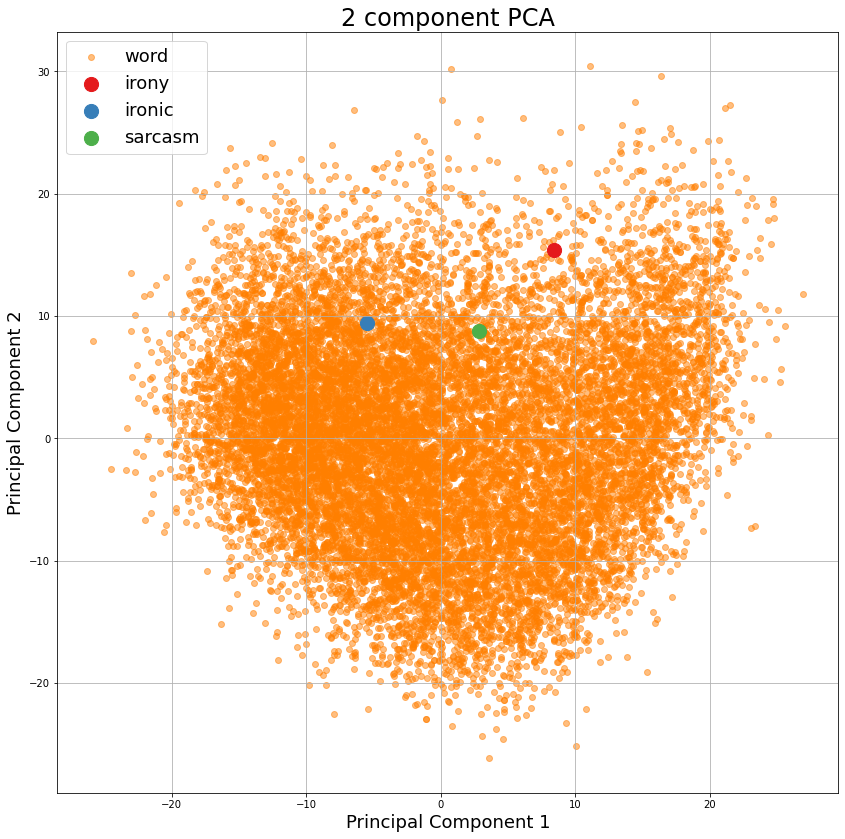

In [2]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

fig = plt.figure(figsize = (14, 14))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 18)
ax.set_ylabel('Principal Component 2', fontsize = 18)
ax.set_title('2 component PCA', fontsize = 24)
# Plot words
colors = get_cmap("Set1").colors
colors_iter = iter([colors[4], colors[0], colors[1], colors[2]])
ax.scatter(df["principal component 1"], df["principal component 2"], c=[next(colors_iter)], label='word', alpha=0.5)
# Plot hot words
for word in ['irony', 'ironic', 'sarcasm']:
    row = df[df['word'] == word]
    ax.scatter(row["principal component 1"], row["principal component 2"], c=[next(colors_iter)], label=word, s=200)
ax.grid()
plt.legend(loc='upper left', fontsize = 18);

### k-nearest neighbors

In [3]:
def k_nearest_neighbors(df, k, x, y):
    out_df = []
    for row in df.values:
        row_x, row_y, *tail = row
        out_df.append([row_x] + [row_y] + tail + [(x - row_x)**2 + (y - row_y)**2])
    columns = list(df.columns) + ["distance"]
    return pd.DataFrame(out_df, columns=columns).sort_values(by=['distance'], ascending=True).iloc[1:].head(k)

def get_position(word):
    row = df[df['word'] == word] 
    x, y = float(row['principal component 1']), float(row['principal component 2'])
    return x, y

#### "Irony"

In [4]:
x, y = get_position('irony')
df_distances = k_nearest_neighbors(df, 10, x, y)
df_distances

,principal component 1,principal component 2,idx,word,#,distance
11443,8.390626,15.396024,15584,registry,2.0,0.004061
2798,7.878809,15.021331,14816,slides,30.0,0.434218
1695,8.158190,14.713049,3991,median,8.0,0.500926
888,8.014405,16.014110,10975,pr,698.0,0.611224
2935,8.736738,14.543050,9932,ai,290.0,0.754421
596,7.794152,14.783385,7674,commons,12.0,0.755137
897,8.335440,16.240794,21688,superb,36.0,0.786303
3350,7.563380,15.611624,20643,yahoo,174.0,0.837864
10705,8.864755,14.461679,19906,sighs,2.0,0.985532
1810,7.689333,16.080111,4654,ex,312.0,1.086583


#### "Ironic"

In [5]:
x, y = get_position('ironic')
df_distances = k_nearest_neighbors(df, 10, x, y)
df_distances

,principal component 1,principal component 2,idx,word,#,distance
14574,-5.394384,9.447875,14541,splitting,2.0,0.016301
5237,-5.475119,9.669621,5930,column,56.0,0.064279
5811,-5.782971,9.394546,9382,allegedly,8.0,0.070346
6111,-5.251696,9.302087,15508,worries,6.0,0.085311
8053,-5.238972,9.267376,7264,connections,12.0,0.101658
3074,-5.429172,9.737868,5164,string,10.0,0.109161
5726,-5.840188,9.554730,3513,rules,128.0,0.121366
10198,-5.486258,9.831492,27023,purported,2.0,0.170472
14363,-5.629965,9.869549,7881,fellowship,2.0,0.214500
5258,-5.403198,9.883460,4618,shall,56.0,0.228282


#### "Sarcasm"

In [6]:
x, y = get_position('sarcasm')
df_distances = k_nearest_neighbors(df, 10, x, y)
df_distances

,principal component 1,principal component 2,idx,word,#,distance
3974,2.987968,8.943935,17203,pathetic,22.0,0.043832
465,3.090181,8.891435,3937,basic,72.0,0.069899
9100,3.062148,8.613761,26380,delightful,12.0,0.077797
4972,2.914678,8.514870,14969,blunt,14.0,0.080442
9416,2.945642,9.073847,12482,downs,8.0,0.090465
4206,2.867650,9.137415,17910,foil,8.0,0.121127
10706,3.124978,9.061085,28462,mouthful,2.0,0.151282
6531,3.251294,8.687908,17053,cache,6.0,0.174692
1029,2.979102,8.391559,9765,est,94.0,0.176514
532,3.171811,9.056928,4636,fund,80.0,0.177370
